In [4]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

df = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
              'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

display(df.head())

X = df.drop('Class label', 1)
y = df['Class label']
#X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels:', np.unique(y))
from sklearn.tree import DecisionTreeClassifier

# criterion : impurity function
# max_depth : maximum depth of tree
# random_state : seed of random number generator
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=3, 
                              random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy (tree): %.2f' % ((y_test == y_pred).sum() / y_test.shape[0]))

# a more convenient way to evaluate a trained model is to use the sklearn.metrics 
from sklearn.metrics import accuracy_score
print('Accuracy (tree, sklearn): %.2f' % accuracy_score(y_test, y_pred))
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  

dot_data = StringIO()

export_graphviz(tree, out_file='tree.dot ',
           #     dot -Tpng tree.dot -o fig-tree.png
                feature_names=X.columns.values)



,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#Training data points: 124
#Testing data points: 54
Class labels: [1 2 3]
Misclassified samples: 2
Accuracy (tree): 0.96
Accuracy (tree, sklearn): 0.96


In [5]:
from sklearn.ensemble import RandomForestClassifier

# criterion : impurity function
# n_estimators :  number of decision trees
# random_state : seed used by the random number generator
# n_jobs : number of cores for parallelism
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy (forest): %.2f' % accuracy_score(y_test, y_pred))

Accuracy (forest): 0.98


 1) Flavanoids                     0.188736
 2) OD280/OD315 of diluted wines   0.162445
 3) Proline                        0.158390
 4) Color intensity                0.154620
 5) Alcohol                        0.102004
 6) Hue                            0.065470
 7) Total phenols                  0.049602
 8) Alcalinity of ash              0.030379
 9) Proanthocyanins                0.023283
10) Malic acid                     0.022439
11) Magnesium                      0.018800
12) Nonflavanoid phenols           0.012507
13) Ash                            0.011325


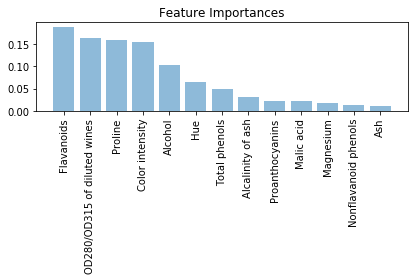

In [12]:
# inline plotting instead of popping out
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X.columns.values[indices],rotation=90)
plt.tight_layout()
plt.savefig('fig-forest-feature-importances.png', dpi=300)
plt.show()

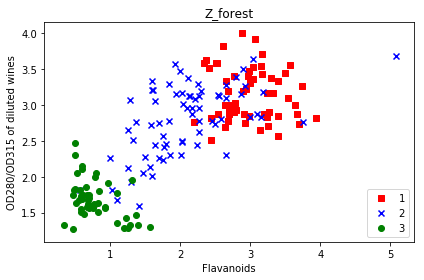

In [13]:
import matplotlib.pyplot as plt

Z_forest = X[['Flavanoids', 'OD280/OD315 of diluted wines']].values

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(Z_forest[y.values==l, 0], 
                Z_forest[y.values==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_forest')
plt.xlabel('Flavanoids')
plt.ylabel('OD280/OD315 of diluted wines')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('fig-forest-z.png', dpi=300)
plt.show()

In [14]:
from sklearn.feature_selection import SelectFromModel

# put prefitted RandomForestClassifier "forest" into SelectFromModel
sfm = SelectFromModel(forest, threshold=0.16, prefit=True)
Z_forest_alt = sfm.transform(X)

for f in range(Z_forest_alt.shape[1]): #mdf
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

 1) Flavanoids                     0.188736
 2) OD280/OD315 of diluted wines   0.162445
